<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Метрики" data-toc-modified-id="Метрики-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Метрики</a></span></li><li><span><a href="#Подготовка-обучающей-и-тестовой-выборок" data-toc-modified-id="Подготовка-обучающей-и-тестовой-выборок-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подготовка обучающей и тестовой выборок</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#KNeighborsRegressor" data-toc-modified-id="KNeighborsRegressor-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>KNeighborsRegressor</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект: «Восстановление золота из руды»

В нашем распоряжении сырые данные золотодобывающей компании. Необходимо подготовить прототип модели машинного обучения. Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды, что в итоге поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цели:**

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

**Описание данных:**

Данные находятся в трёх файлах:

- `gold_recovery_train_new.csv` — обучающая выборка;
- `gold_recovery_test_new.csv` — тестовая выборка;
- `gold_recovery_full_new.csv` — исходные данные.

Данные индексируются датой и временем получения информации (признак `date`). Соседние по времени параметры часто похожи.

Наименование признаков приведено в следующем виде:
`[этап].[тип_параметра].[название_параметра]`

- Возможные значения для блока `[этап]`:
    - rougher — флотация
    - primary_cleaner — первичная очистка
    - secondary_cleaner — вторичная очистка
    - final — финальные характеристики
- Возможные значения для блока `[тип_параметра]`:
    - input — параметры сырья
    - output — параметры продукта
    - state — параметры, характеризующие текущее состояние этапа
    - calculation — расчётные характеристики

*Целевые признаки*:
1. `rougher.output.recovery`
2. `final.output.recovery`

## Первичный анализ данных

**Необходимо:**

1. Проверить правильность расчета эффективности обогащания на обучающей выборке — признак `rougher.output.recovery`.
2. Сравнить тестовую и обучающую выборки.
3. Провести предобработку данных.

In [40]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor

%matplotlib inline
sns.set_style("darkgrid")
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)
random_seed = 17

In [2]:
try:
    df1 = pd.read_csv('gold_recovery_full_new.csv', index_col='date')
    df2 = pd.read_csv('gold_recovery_train_new.csv', index_col='date')
    df3 = pd.read_csv('gold_recovery_test_new.csv', index_col='date')
except FileNotFoundError:
    df1 = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')
    df2 = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
    df3 = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')

In [3]:
for i, df in enumerate([df1, df2, df3]):
    print(f'Датафрейм {i+1}: Размер - {df.shape}', end='\n')
    display(df.head())
    print('\n')

Датафрейм 1: Размер - (19439, 86)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-4



Датафрейм 2: Размер - (14149, 86)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,127.09,10.13,7.25,0.99,8.55,10.39,19.53,34.17,14.94,2.53,7.48,2.11,1549.78,-498.91,1551.43,-516.40,1549.87,-498.67,1554.37,-493.43,41885.71,3481.78,3520.34,2.84,6.10,2.28,523.55,55.49,36.81,6.49,11.99,6.01,11.84,6.01,11.50,7.10,28.03,19.79,87.11,5.01,0.51,19.15,1.17,999.71,-404.07,1603.01,-434.72,1602.38,-442.20,1598.94,-451.29,1404.47,-455.46,1416.35,-451.94,14.50,4.69,8.76,2.61,25.85,-498.53,23.89,-501.41,23.96,-495.26,21.94,-499.34,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,125.63,10.30,7.25,1.00,8.56,10.50,19.37,34.12,16.25,3.05,6.73,2.35,1576.17,-500.90,1575.95,-499.87,1575.99,-499.32,1574.48,-498.93,42050.86,3498.37,3489.98,2.86,6.16,2.27,525.29,57.28,35.75,6.48,11.97,6.01,12.00,6.01,11.62,7.28,28.07,20.05,86.84,4.96,0.54,18.97,1.18,1000.29,-400.07,1600.75,-449.95,1600.48,-449.83,1600.53,-449.95,1399.23,-4



Датафрейм 3: Размер - (5290, 52)


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,-500.70,1399.00,-499.49,13.13,5.64,489.79,62.71,42.02,12.08,16.92,6.15,16.87,6.15,1001.85,-350.30,1249.74,-399.11,1249.75,-399.40,1198.29,-399.49,999.47,-399.53,949.57,-398.18,24.94,-500.49,14.95,-500.01,20.02,-450.40,13.99,-449.83,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,-499.24,1399.51,-500.42,13.04,5.53,490.10,61.96,41.19,11.92,17.00,6.00,17.00,6.00,998.69,-350.43,1248.40,-399.95,1249.51,-399.63,1200.51,-399.94,1000.00,-399.49,950.20,-405.79,24.92,-499.81,14.93,-500.76,19.99,-450.11,14.09,-450.06,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,-502.15,1399.50,-499.72,13.14,5.43,489.62,66.90,42.55,12.09,16.99,5.85,16.98,5.85,998.52,-349.78,1247.44,-400.26,1248.21,-401.07,1199.77,-400.79,999.93,-399.24,950.32,-400.86,24.91,-500.30,15.00,-500.99,20.04,-450.26,14.08,-449.66,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,-498.36,1401.07,-501.04,12.40,5.11,476.62,59.87,41.06,12.18,16.53,5.80,16.52,5.80,1000.28,-350.17,1251.32,-398.66,1250.49,-399.75,1199.40,-397.50,1001.93,-400.44,950.74,-399.80,24.89,-499.38,14.92,-499.86,20.03,-449.37,14.01,-449.53,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,-500.81,1399.48,-499.37,11.33,4.77,488.25,63.32,41.27,11.29,13.61,5.74,13.65,5.74,996.54,-350.56,1304.66,-399.51,1306.46,-399.05,1248.70,-400.88,1058.84,-398.99,949.65,-399.28,24.89,-499.36,14.98,-500.19,19.96,-450.64,14.01,-450.02,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


In [4]:
if df1.shape[0] - df2.shape[0] == df3.shape[0]:
    print(f'Для тестовой выборки было отобрано {round(df3.shape[0]/df1.shape[0] *100, 1)}% данных исходной выборки')
else:
    print('Ошибка')

Для тестовой выборки было отобрано 27.2% данных исходной выборки


In [5]:
df1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [6]:
for i, df in enumerate([df1, df2, df3]):
    print(f'Число пропущенных значений в датафрейме {i+1}: {df.isna().sum().sum()}')

Число пропущенных значений в датафрейме 1: 4481
Число пропущенных значений в датафрейме 2: 4100
Число пропущенных значений в датафрейме 3: 90


In [7]:
for i, df in enumerate([df1, df2]):
    print(f"Пропущенно значений целевого признака в датафрейме {i+1}: \
          \n{df[['rougher.output.recovery', 'final.output.recovery']].isna().sum()}", end='\n\n')

Пропущенно значений целевого признака в датафрейме 1:           
rougher.output.recovery    0
final.output.recovery      0
dtype: int64

Пропущенно значений целевого признака в датафрейме 2:           
rougher.output.recovery    0
final.output.recovery      0
dtype: int64



In [8]:
for i, df in enumerate([df1, df2, df3]):
    print(f'Число дубликатов в датафрейме {i+1}: {df.duplicated().sum()}')

Число дубликатов в датафрейме 1: 0
Число дубликатов в датафрейме 2: 0
Число дубликатов в датафрейме 3: 0


In [9]:
for i, df in enumerate([df1, df2, df3]):
    print(f'Датафрейм {i+1}: Размер - {df.shape}', end='\n')
    display(df.describe())
    print('\n')

Датафрейм 1: Размер - (19439, 86)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.00,19438.00,19228.00,19439.00,19439.00,19438.00,19338.00,19433.00,19439.00,19415.00,19402.00,19439.00,19335.00,19439.00,19323.00,19069.00,19439.00,19435.00,19418.00,19377.00,19439.00,19435.00,19438.00,19435.00,19438.00,19437.00,19438.00,19436.00,19438.00,19437.00,19437.00,19437.00,19439.00,19439.00,19339.00,19428.00,19294.00,19340.00,19439.00,19405.00,19431.00,19395.00,18986.00,19439.00,19439.00,19416.00,19439.00,19439.00,19438.00,19439.00,19439.00,19439.00,19438.00,19438.00,19438.00,19438.00,19438.00,19438.00,19439.00,19439.00,19003.00,19439.00,19439.00,19439.00,19437.00,19427.00,17691.00,19439.00,19219.00,19438.00,19416.00,19438.00,19426.00,19438.00,19438.00,19438.00,19433.00,19438.00,19438.00,19438.00,19438.00,19438.00,19438.00,19438.00,19437.00,19438.00
mean,5.17,9.98,9.50,44.08,67.05,9.69,2.71,10.58,3.04,144.62,8.82,7.31,1.02,8.44,9.83,10.49,32.12,16.15,3.44,7.97,3.91,1589.35,-491.20,1591.34,-492.19,1586.67,-491.98,1542.91,-488.02,42171.19,3393.05,3256.85,2.42,8.79,3.60,478.32,58.97,36.70,8.27,12.33,6.02,12.06,6.07,11.99,7.61,28.81,19.77,83.33,



Датафрейм 2: Размер - (14149, 86)


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.00,14148.00,13938.00,14149.00,14149.00,14149.00,14049.00,14144.00,14149.00,14129.00,14117.00,14149.00,14049.00,14149.00,14063.00,13863.00,14149.00,14148.00,14134.00,14103.00,14149.00,14145.00,14148.00,14145.00,14148.00,14147.00,14148.00,14146.00,14148.00,14148.00,14148.00,14148.00,14149.00,14149.00,14049.00,14141.00,14005.00,14071.00,14149.00,14120.00,14141.00,14113.00,13721.00,14149.00,14149.00,14127.00,14149.00,14149.00,14148.00,14149.00,14149.00,14149.00,14148.00,14148.00,14148.00,14148.00,14148.00,14148.00,14149.00,14149.00,13713.00,14149.00,14149.00,14149.00,14147.00,14139.00,12544.00,14149.00,13932.00,14148.00,14128.00,14148.00,14145.00,14148.00,14148.00,14148.00,14143.00,14148.00,14148.00,14148.00,14148.00,14148.00,14148.00,14148.00,14147.00,14148.00
mean,5.14,10.13,9.20,44.00,66.52,9.61,2.60,10.51,2.92,133.32,8.87,7.32,0.89,8.20,9.59,10.11,32.39,16.30,3.44,7.53,3.84,1608.00,-488.78,1608.61,-489.17,1608.88,-489.61,1542.19,-483.46,40382.65,3456.61,3253.36,2.37,8.58,3.52,474.03,60.11,36.31,7.87,11.76,5.85,11.37,5.89,11.78,7.66,28.30,19.44,82.70



Датафрейм 3: Размер - (5290, 52)


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.00,5285.00,5290.00,5286.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5287.00,5289.00,5269.00,5290.00,5285.00,5290.00,5282.00,5265.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5287.00,5290.00,5288.00,5290.00,5281.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00,5290.00
mean,174.84,8.68,7.27,1.38,1539.49,-497.67,1545.17,-500.27,1527.27,-498.33,1544.84,-500.20,9.37,3.80,489.80,55.95,37.72,9.33,13.86,6.47,13.92,6.51,1053.40,-395.73,1318.93,-475.24,1301.60,-474.84,1214.85,-475.68,1056.65,-469.03,997.95,-470.48,26.31,-502.75,21.95,-501.99,25.40,-507.49,20.98,-506.63,16.32,-505.14,13.74,-463.35,12.80,-501.33,9.88,-495.66,17.30,-501.79
std,43.03,3.07,0.61,0.64,116.80,19.95,122.22,32.97,122.54,21.96,124.77,31.05,1.93,0.95,108.04,19.08,5.49,1.62,3.35,1.07,3.22,0.89,121.14,91.09,156.45,45.65,171.27,45.86,185.76,47.84,131.54,59.33,128.22,60.76,3.43,28.76,4.35,34.58,6.53,47.62,6.74,44.53,3.49,31.43,3.43,86.19,3.03,17.95,2.87,34.54,4.54,39.04
min,2.57,0.00,5.65,0.00,0.00,-795.32,0.00,-800.00,0.00,-799.96,0.00,-799.79,0.57,0.27,0.00,0.05,1.39,0.57,0.00,0.00,0.00,0.01,-0.04,-657.95,-0.72,-650.25,-0.06,-647.54,-0.99,-648.39,-1.98,-649.27,-2.59,-649.95,0.21,-784.09,0.01,-797.78,0.00,-799.76,0.00,-809.33,0.00,-799.80,0.00,-800.84,0.07,-797.32,0.53,-800.22,-0.08,-809.74
25%,147.12,6.49,6.89,0.91,1498.94,-500.36,1498.97,-500.70,1473.23,-501.02,1499.48,-500.45,8.11,3.24,407.02,43.91,34.51,8.21,12.00,6.00,12.00,6.00,999.21,-499.92,1200.87,-500.26,1199.65,-500.23,1093.37,-500.44,999.36,-500.19,901.02,-500.62,24.94,-500.21,20.00,-500.22,22.98,-500.30,17.97,-500.15,14.04,-500.87,12.03,-500.32,10.91,-500.73,8.04,-500.19,14.00,-500.69
50%,177.83,8.05,7.25,1.20,1585.13,-499.97,1595.62,-500.03,1549.59,-500.02,1594.58,-500.02,9.76,3.74,499.05,50.84,37.98,9.59,14.00,6.50,14.00,6.50,1000.47,-399.69,1302.25,-499.84,1300.20,-499.78,1207.01,-499.69,1047.50,-499.77,999.44,-499.68,26.91,-500.00,22.94,-500.02,25.01,-500.03,21.00,-500.01,17.01,-500.12,14.96,-499.58,12.95,-499.99

**Проверка правильности расчета эффективности обогащания на обучающей выборке — признак `rougher.output.recovery`.**

*Эффективность обогащения рассчитывается по формуле:*

$$Recovery = \frac{C\cdot(F-T)}{F\cdot(C-T)}\cdot100\%$$

*где:*
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

*Необходимо найти MAE между расчётами и значением соответствующего признака*

In [10]:
c, f, t = 'rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au'

recovery = (df2[c]*(df2[f]-df2[t]))/(df2[f]*(df2[c]-df2[t]))*100
print(f"MAE равняется {mae(df2['rougher.output.recovery'], recovery)}")

MAE равняется 9.73512347450521e-15


**С учетом несоответствия количества столбцов в обучающей и тестовой выборках, необходимо проанализировть признаки, недоступные в последней**

In [11]:
missing_features = list(set(df2.columns) - set(df3.columns))
print(f'В тестовой выборке недоступно {len(missing_features)} признака:', end='\n\n')
print(*(missing_features), sep='\n')

В тестовой выборке недоступно 34 признака:

primary_cleaner.output.concentrate_pb
primary_cleaner.output.tail_ag
rougher.output.tail_pb
primary_cleaner.output.tail_pb
primary_cleaner.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_ag
rougher.output.tail_sol
final.output.concentrate_ag
rougher.output.concentrate_sol
primary_cleaner.output.concentrate_sol
rougher.output.tail_ag
rougher.output.recovery
rougher.calculation.au_pb_ratio
primary_cleaner.output.tail_au
final.output.tail_pb
final.output.recovery
final.output.concentrate_au
primary_cleaner.output.tail_sol
final.output.tail_sol
secondary_cleaner.output.tail_pb
rougher.output.concentrate_au
secondary_cleaner.output.tail_sol
final.output.concentrate_pb
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.floatbank10_sulfate_to_au_feed
final.output.concentrate_sol
final.output.tail_au
rougher.output.tail_au
secondary_cleaner.output.tail_au
final.output.tail_ag
secondary_cleaner.output

Можно заметить, что все пропущенные признаки тестовой выборки относятся к следующим данным `[тип_параметра]`:
- `output`;
- `calculation`.

Данные признаки либо являются целевыми, как `rougher.output.recovery` и `final.output.recovery`, либо непосредственно используются для их расчета. Именно по этой причине они и отсутствуют в тестовой выборке.

**Выводы:**
1. Пространство признаков состоит из *86* числовых признаков (*2* целевые пременные), из которых для обучения моделей будет использовано *52*.
2. Исходные данные содержат *4481* пропущенное значение.
3. Исходные таблицы не содержат повторяющихся значений.
4. Эффективность обогащания на обучающей выборке расчитанна правильно. Значение MAE *9.73512347450521e-15* является погрешностью из-за расчетов проводимых с типом данных *float*.

## Предобработка данных

**Необходимо:**
1. В обучающей выборке оставить лишь необходимые для обучения модели признаки.
2. Восстановить пропущенные значения.

In [12]:
missing_features.remove('rougher.output.recovery')
missing_features.remove('final.output.recovery')
df2 = df2.drop(missing_features, axis=1)
print(df2.shape[1])

54


Так как данные индексируются датой и временем получения информации, то можно предполагать, что соседние по времени параметры часто схожи.

In [13]:
df1 = df1.ffill(axis = 0)
for i, df in enumerate([df2, df3]):
    df.update(df1, overwrite=False)
    print(f'Число пропущенных значений в датафрейме {i+2}: {df.isna().sum().sum()}')
    print(f'Размер датафрейма {i+2}: {df.shape}', end='\n\n')

Число пропущенных значений в датафрейме 2: 0
Размер датафрейма 2: (14149, 54)

Число пропущенных значений в датафрейме 3: 0
Размер датафрейма 3: (5290, 52)



## Исследовательский анализ данных

**Необходимо:**
1. Проанализировать изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.
2. Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.
3. Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

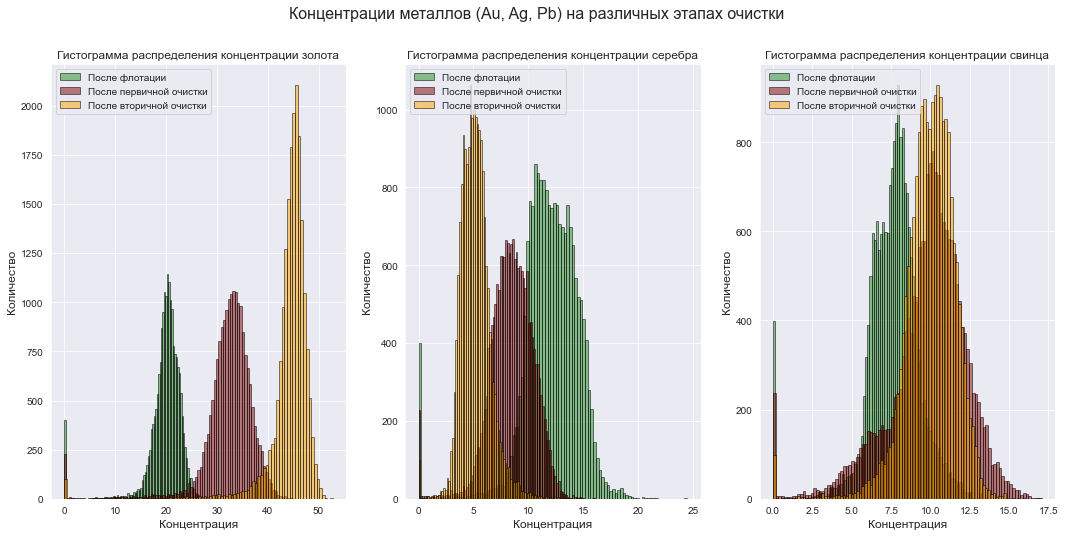

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(200, 100))

plt.suptitle('Концентрации металлов (Au, Ag, Pb) на различных этапах очистки', fontsize=16)


ax = df1['rougher.output.concentrate_au'].hist(bins=100, label='После флотации', alpha=0.5, ec='black', 
                                               color='forestgreen', ax=axes[0], figsize=(18, 8))
ax = df1['primary_cleaner.output.concentrate_au'].hist(bins=100, label='После первичной очистки', alpha=0.5, ec='black', 
                                                       color='maroon', ax=axes[0], figsize=(18, 8))
ax = df1['final.output.concentrate_au'].hist(bins=100, label='После вторичной очистки', alpha=0.5, ec='black', 
                                             color='orange', ax=axes[0], figsize=(18, 8))

ax.legend(loc='upper left')
ax.set_title('Гистограмма распределения концентрации золота', fontsize=12)
ax.set_xlabel('Концентрация', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)


ax = df1['rougher.output.concentrate_ag'].hist(bins=100, label = 'После флотации', alpha=0.5, ec='black', 
                                               color = 'forestgreen', ax=axes[1], figsize=(18, 8))
ax = df1['primary_cleaner.output.concentrate_ag'].hist(bins=100, label = 'После первичной очистки', alpha=0.5, ec='black', 
                                                       color = 'maroon', ax=axes[1], figsize=(18, 8))
ax = df1['final.output.concentrate_ag'].hist(bins=100, label = 'После вторичной очистки', alpha=0.5, ec='black', 
                                             color = 'orange', ax=axes[1], figsize=(18, 8))

ax.legend(loc='upper left')
ax.set_title('Гистограмма распределения концентрации серебра', fontsize=12)
ax.set_xlabel('Концентрация', fontsize=12)
ax.set_ylabel('Количество', fontsize=12)


ax = df1['rougher.output.concentrate_pb'].hist(bins=100, label = 'После флотации', alpha=0.5, ec='black', 
                                               color = 'forestgreen', ax=axes[2], figsize=(18, 8))
ax = df1['primary_cleaner.output.concentrate_pb'].hist(bins=100, label = 'После первичной очистки', alpha=0.5, ec='black', 
                                                       color = 'maroon', ax=axes[2], figsize=(18, 8))
ax = df1['final.output.concentrate_pb'].hist(bins=100, label = 'После вторичной очистки', alpha=0.5, ec='black', 
                                             color = 'orange', ax=axes[2], figsize=(18, 8))

ax.legend(loc='upper left')
ax.set_title('Гистограмма распределения концентрации свинца', fontsize=12)
ax.set_xlabel('Концентрация', fontsize=12)
ax.set_ylabel('Количество', fontsize=12);

In [15]:
au = ['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']
ag = ['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']
pb = ['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
for i, j in zip([au, ag, pb], ['Золото', 'Серебро', 'Свинец']):
    print(j)
    display(df1[i].mean())

Золото


rougher.output.concentrate_au           19.77
primary_cleaner.output.concentrate_au   32.12
final.output.concentrate_au             44.08
dtype: float64

Серебро


rougher.output.concentrate_ag           11.99
primary_cleaner.output.concentrate_ag    8.44
final.output.concentrate_ag              5.17
dtype: float64

Свинец


rougher.output.concentrate_pb           7.61
primary_cleaner.output.concentrate_pb   9.81
final.output.concentrate_pb             9.98
dtype: float64

**Выводы:**
- Концентрация золота в продукте после каждого этапа очистки значительно возрастает.
- Концентрация серебра в продукте после каждого этапа очистки падает.
- Концентрация свинца в продукте после каждого этапа очистки имеет тенденцию к росту, однако не столь заметно как золото.

### Распределения размеров гранул сырья на обучающей и тестовой выборках

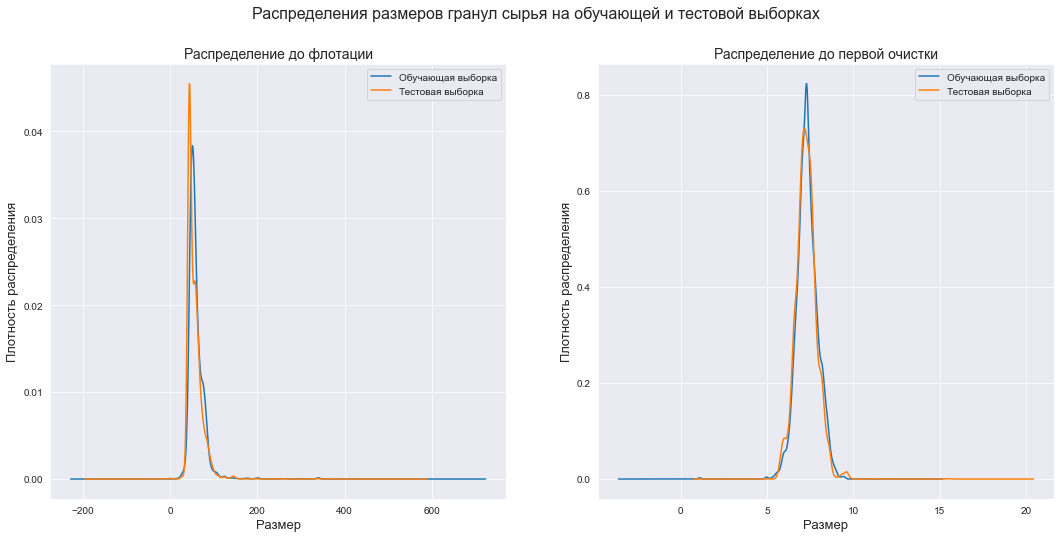

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(200, 100))

plt.suptitle('Распределения размеров гранул сырья на обучающей и тестовой выборках', fontsize=16)

ax = df2['rougher.input.feed_size'].plot(kind='density', ax=axes[0], figsize=(18, 8), label='Обучающая выборка')
ax = df3['rougher.input.feed_size'].plot(kind='density', ax=axes[0], figsize=(18, 8), label='Тестовая выборка')

ax.legend(loc='upper right')
ax.set_title('Распределение до флотации', fontsize=14)
ax.set_xlabel('Размер', fontsize=13)
ax.set_ylabel('Плотность распределения', fontsize=13);


ax = df2['primary_cleaner.input.feed_size'].plot(kind='density', ax=axes[1], figsize=(18, 8), label='Обучающая выборка')
ax = df3['primary_cleaner.input.feed_size'].plot(kind='density', ax=axes[1], figsize=(18, 8), label='Тестовая выборка')

ax.legend(loc='upper right')
ax.set_title('Распределение до первой очистки', fontsize=14)
ax.set_xlabel('Размер', fontsize=13)
ax.set_ylabel('Плотность распределения', fontsize=13);

Для проверки равенства распределения размеров гранул сырья на обучающей и тестовой выборках воспользуемся *тестом Левена*.

**H0** — распределение размера гранул в обучающей выборке не отличается от распределения размера гранул в тестовой выборке.

**H1** — распределение размера гранул в обучающей выборке отличается от распределения размера гранул в тестовой выборке.

In [17]:
print('До флотации')
print('_'*70, end='\n\n')
feed_size_train = df2['rougher.input.feed_size']
feed_size_test = df3['rougher.input.feed_size']

print(f'Средний размер гранул в обучающей выборке: {round(feed_size_train.mean(), 2)}')
print(f'Средний размер гранул в тестовой выборке: {round(feed_size_test.mean(), 2)}', end='\n\n')

alpha = 0.05

results = st.levene(feed_size_train, feed_size_test)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу", end='\n\n')
else:
    print("Не удалось отвергнуть нулевую гипотезу", end='\n\n')
    
print('До первой очистки')
print('_'*70, end='\n\n')

feed_size_train = df2['primary_cleaner.input.feed_size']
feed_size_test = df3['primary_cleaner.input.feed_size']

print(f'Средний размер гранул в обучающей выборке: {round(feed_size_train.mean(), 2)}')
print(f'Средний размер гранул в тестовой выборке: {round(feed_size_test.mean(), 2)}', end='\n\n')

alpha = 0.05

results = st.levene(feed_size_train, feed_size_test)

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

До флотации
______________________________________________________________________

Средний размер гранул в обучающей выборке: 60.24
Средний размер гранул в тестовой выборке: 55.95

p-value: 0.6605153520089053
Не удалось отвергнуть нулевую гипотезу

До первой очистки
______________________________________________________________________

Средний размер гранул в обучающей выборке: 7.32
Средний размер гранул в тестовой выборке: 7.27

p-value: 0.9823609752105191
Не удалось отвергнуть нулевую гипотезу


### Суммарная концентрация всех веществ на разных стадиях

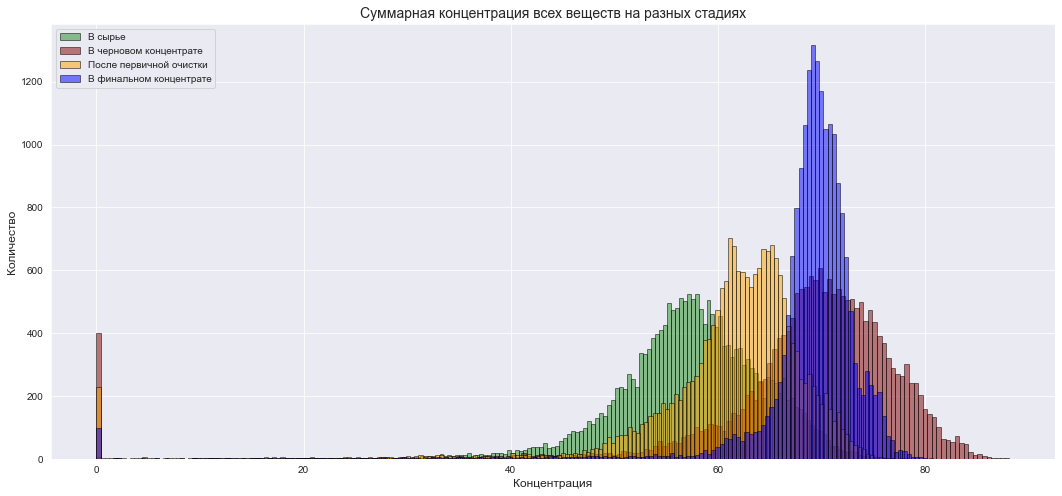

In [18]:
df1['input_sum'] = (df1['rougher.input.feed_au'] +
                    df1['rougher.input.feed_ag'] + 
                    df1['rougher.input.feed_pb'] + 
                    df1['rougher.input.feed_sol']) 

df1['rougher_sum'] = (df1['rougher.output.concentrate_au'] + 
                      df1['rougher.output.concentrate_ag'] +  
                      df1['rougher.output.concentrate_pb'] +
                      df1['rougher.output.concentrate_sol'])

df1['primary_sum'] = (df1['primary_cleaner.output.concentrate_au'] + 
                      df1['primary_cleaner.output.concentrate_ag'] +  
                      df1['primary_cleaner.output.concentrate_pb'] +
                      df1['primary_cleaner.output.concentrate_sol'])

df1['final_sum'] = (df1['final.output.concentrate_au'] + 
                    df1['final.output.concentrate_ag'] +  
                    df1['final.output.concentrate_pb'] +
                    df1['final.output.concentrate_sol'])


ax = df1['input_sum'].hist(bins=200, label = 'В сырье', alpha=0.5, ec='black', 
                           color = 'forestgreen', figsize=(18, 8))
ax = df1['rougher_sum'].hist(bins=200, label = 'В черновом концентрате', alpha=0.5, ec='black', 
                             color = 'maroon', figsize=(18, 8))
ax = df1['primary_sum'].hist(bins=200, label = 'После первичной очистки', alpha=0.5, ec='black', 
                             color = 'orange', figsize=(18, 8))
ax = df1['final_sum'].hist(bins=200, label = 'В финальном концентрате', alpha=0.5, ec='black', 
                           color = 'blue', figsize=(18, 8))


ax.legend(loc='upper left')
ax.set_title('Суммарная концентрация всех веществ на разных стадиях', fontsize=14)
ax.set_xlabel('Концентрация', fontsize=12)
ax.set_ylabel('Количество', fontsize=12);

In [19]:
df1[['input_sum', 'rougher_sum', 'primary_sum', 'final_sum']].describe()

,input_sum,rougher_sum,primary_sum,final_sum
count,19439.00,19439.00,19439.00,19439.00
mean,57.32,68.17,60.76,68.65
std,7.21,12.49,10.02,7.43
min,0.04,0.00,0.00,0.00
25%,53.56,66.01,58.93,67.93
50%,57.59,70.18,62.50,69.60
75%,61.95,74.36,65.67,71.37
max,76.98,88.14,80.75,80.21


В результате проведенного анализ были обнаружены нулевые и околонулевые значения. Для дальнейшей работы их необходимо удалить. Определим выбросы как: все значения, лежащие на 3 межквартильных размаха ниже первого квартиля. 

In [20]:
columns_ls = ['input_sum', 'rougher_sum', 'primary_sum', 'final_sum']

for column in columns_ls:
    minimum = df1[column].quantile(0.25) - 3 * (df1[column].quantile(0.75) - df1[column].quantile(0.25))       
    df1 = df1.loc[(df1[column]>= minimum), :]

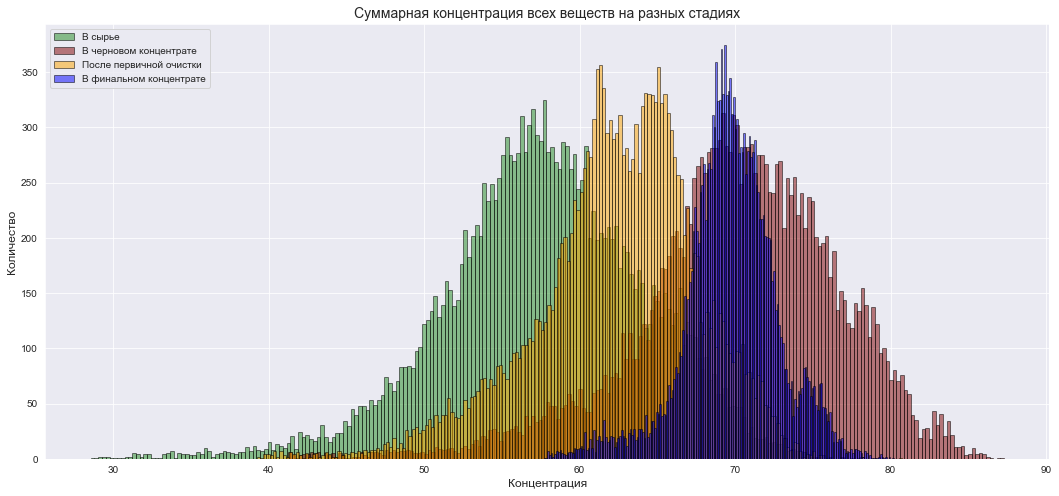

In [21]:
ax = df1['input_sum'].hist(bins=200, label = 'В сырье', alpha=0.5, ec='black', 
                           color = 'forestgreen', figsize=(18, 8))
ax = df1['rougher_sum'].hist(bins=200, label = 'В черновом концентрате', alpha=0.5, ec='black', 
                             color = 'maroon', figsize=(18, 8))
ax = df1['primary_sum'].hist(bins=200, label = 'После первичной очистки', alpha=0.5, ec='black', 
                             color = 'orange', figsize=(18, 8))
ax = df1['final_sum'].hist(bins=200, label = 'В финальном концентрате', alpha=0.5, ec='black', 
                           color = 'blue', figsize=(18, 8))


ax.legend(loc='upper left')
ax.set_title('Суммарная концентрация всех веществ на разных стадиях', fontsize=14)
ax.set_xlabel('Концентрация', fontsize=12)
ax.set_ylabel('Количество', fontsize=12);

In [22]:
df2 = df2[df2.index.isin(df1.index)]
df3 = df3[df3.index.isin(df1.index)]
print(f'Размер обучающей выборки: {df2.shape}', end='\n\n')
print(f'Размер тестовой выборки: {df3.shape}')

Размер обучающей выборки: (12979, 54)

Размер тестовой выборки: (4886, 52)


## Моделирование

**Необходимо:**
1. Ввести новые метрики качества: 
    - sMAPE — Symmetric Mean Absolute Percentage Error: 
    $$sMAPE=\frac{1}{N}\cdot\sum_{i=1}^N\frac{|Y_{i}-\hat{Y_{i}}|}{(|Y_{i}|+|\hat{Y_{i}}|)\cdot0.5}\cdot100\%$$
    
    - итоговое sMAPE: 
    $$итоговое\: sMAPE=25\%\cdot sMAPE(rougher)+75\%\cdot sMAPE(final)$$    
    
    
    
2. Обучить модели и выбрать лучшую на основании введенных метрик качества.
3. Лучшую модель проверить на тестовой выборке.

### Метрики

In [23]:
def smape(y_true, y_pred):
    return np.mean(abs(y_true - y_pred)/((abs(y_true) + abs(y_pred))*0.5))*100

def final_sMAPE(y_true, y_pred):
    return (0.25*smape(y_true['rougher.output.recovery'], y_pred[:, 0]) + 
           + 0.75*smape(y_true['final.output.recovery'], y_pred[:, 1]))

In [24]:
smape_score = make_scorer(final_sMAPE, greater_is_better=False)

### Подготовка обучающей и тестовой выборок

In [25]:
x_train = df2.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_train = df2[['rougher.output.recovery', 'final.output.recovery']]

x_test = df3.copy()
y_test = df1[df1.index.isin(df3.index)][['rougher.output.recovery', 'final.output.recovery']]
print(f'Размер x_train: {x_train.shape}')
print(f'Размер y_train: {y_train.shape}')
print(f'Размер x_test: {x_test.shape}')
print(f'Размер y_test: {y_test.shape}')

Размер x_train: (12979, 52)
Размер y_train: (12979, 2)
Размер x_test: (4886, 52)
Размер y_test: (4886, 2)


In [26]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train[:] = scaler.transform(x_train)
x_test[:] = scaler.transform(x_test)

### RandomForestRegressor

In [27]:
model = RandomForestRegressor(random_state=random_seed, max_features='log2')
params = {'n_estimators': range(1, 61, 10),
          'max_depth': range(2, 10)}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring=smape_score, n_jobs=1, verbose=2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=2, n_

[CV] END .......................max_depth=5, n_estimators=21; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=21; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=21; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=21; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.4s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.3s
[CV] END .......................max_depth=5, n_estimators=41; total time=   0.5s
[CV] END .......................max_depth=5, n_estimators=41; total time=   0.5s
[CV] END .......................max_depth=5, n_estimators=41; total time=   0.5s
[CV] END ...................

[CV] END .......................max_depth=8, n_estimators=41; total time=   0.8s
[CV] END .......................max_depth=8, n_estimators=41; total time=   0.8s
[CV] END .......................max_depth=8, n_estimators=51; total time=   1.0s
[CV] END .......................max_depth=8, n_estimators=51; total time=   1.1s
[CV] END .......................max_depth=8, n_estimators=51; total time=   1.0s
[CV] END .......................max_depth=8, n_estimators=51; total time=   0.9s
[CV] END .......................max_depth=8, n_estimators=51; total time=   1.0s
[CV] END ........................max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=1; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='log2',
                                             random_state=17),
             n_jobs=1,
             param_grid={'max_depth': range(2, 10),
                         'n_estimators': range(1, 61, 10)},
             scoring=make_scorer(final_sMAPE, greater_is_better=False),
             verbose=2)

In [28]:
rf_score = round(abs(grid.best_score_), 3)
print(f'Лучшая sMAPE Random Forest: {rf_score}')
print(f'Лучшие параметры модели Random Forest: {grid.best_params_}')

Лучшая sMAPE Random Forest: 7.854
Лучшие параметры модели Random Forest: {'max_depth': 7, 'n_estimators': 51}


### LinearRegression

In [29]:
model = LinearRegression()
params = {'fit_intercept': [True, False],
          'normalize': [True, False]}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring=smape_score, n_jobs=1, verbose=2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END .................fit_intercept=True, normalize=True; total time=   0.0s
[CV] END ................fit_intercept=True, normalize=False; total time=   0.0s
[CV] END ................fit_intercept=True, normalize=False; total time=   0.0s
[CV] END ................fit_intercept=True, normalize=False; total time=   0.0s
[CV] END ................fit_intercept=True, normalize=False; total time=   0.0s
[CV] END ................fit_intercept=True, normalize=False; total time=   0.0s
[CV] END ................fit_intercept=False, normalize=True; total time=   0.0s
[CV] END ................fit_intercept=False, nor

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring=make_scorer(final_sMAPE, greater_is_better=False),
             verbose=2)

In [30]:
ln_score = round(abs(grid.best_score_), 3)
print(f'Лучшая sMAPE Linear Regression: {ln_score}')
print(f'Лучшие параметры модели Logistic Regression: {grid.best_params_}')

Лучшая sMAPE Linear Regression: 9.821
Лучшие параметры модели Logistic Regression: {'fit_intercept': True, 'normalize': True}


### KNeighborsRegressor

In [31]:
model = KNeighborsRegressor(algorithm='auto')                               
params = {'n_neighbors': range(10, 60, 10),
          'leaf_size': range(10, 50, 10),
          'weights': ['uniform', 'distance'],
          'p': [1,2]}

grid = GridSearchCV(model, param_grid=params, cv=5, scoring=smape_score, n_jobs=1, verbose=2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END .leaf_size=10, n_neighbors=10, p=1, weights=uniform; total time=   1.3s
[CV] END .leaf_size=10, n_neighbors=10, p=1, weights=uniform; total time=   1.2s
[CV] END .leaf_size=10, n_neighbors=10, p=1, weights=uniform; total time=   1.2s
[CV] END .leaf_size=10, n_neighbors=10, p=1, weights=uniform; total time=   1.1s
[CV] END .leaf_size=10, n_neighbors=10, p=1, weights=uniform; total time=   1.1s
[CV] END leaf_size=10, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=10, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=10, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=10, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=10, n_neighbors=10, p=1, weights=distance; total time=   1.2s
[CV] END .leaf_size=10, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=10, n_neighbors=10, p=2, we

[CV] END .leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   1.1s
[CV] END .leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   1.1s
[CV] END .leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   1.1s
[CV] END .leaf_size=20, n_neighbors=10, p=1, weights=uniform; total time=   1.2s
[CV] END leaf_size=20, n_neighbors=10, p=1, weights=distance; total time=   1.3s
[CV] END leaf_size=20, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=20, n_neighbors=10, p=1, weights=distance; total time=   1.2s
[CV] END leaf_size=20, n_neighbors=10, p=1, weights=distance; total time=   1.2s
[CV] END leaf_size=20, n_neighbors=10, p=1, weights=distance; total time=   1.3s
[CV] END .leaf_size=20, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=20, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=20, n_neighbors=10, p=2, weights=uniform; total time=   0.4s
[CV] END .leaf_size=20, n_ne

[CV] END .leaf_size=30, n_neighbors=10, p=1, weights=uniform; total time=   1.3s
[CV] END .leaf_size=30, n_neighbors=10, p=1, weights=uniform; total time=   1.2s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   1.2s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END leaf_size=30, n_neighbors=10, p=1, weights=distance; total time=   1.1s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=30, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END leaf_size=30, n_nei

[CV] END leaf_size=40, n_neighbors=10, p=1, weights=distance; total time=   1.2s
[CV] END leaf_size=40, n_neighbors=10, p=1, weights=distance; total time=   1.3s
[CV] END leaf_size=40, n_neighbors=10, p=1, weights=distance; total time=   1.3s
[CV] END leaf_size=40, n_neighbors=10, p=1, weights=distance; total time=   1.3s
[CV] END leaf_size=40, n_neighbors=10, p=1, weights=distance; total time=   1.3s
[CV] END .leaf_size=40, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=40, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=40, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=40, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END .leaf_size=40, n_neighbors=10, p=2, weights=uniform; total time=   0.3s
[CV] END leaf_size=40, n_neighbors=10, p=2, weights=distance; total time=   0.3s
[CV] END leaf_size=40, n_neighbors=10, p=2, weights=distance; total time=   0.3s
[CV] END leaf_size=40, n_nei

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'leaf_size': range(10, 50, 10),
                         'n_neighbors': range(10, 60, 10), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(final_sMAPE, greater_is_better=False),
             verbose=2)

In [32]:
knn_score = round(abs(grid.best_score_), 3)
print(f'Лучшая sMAPE KNeighbors Regressor: {knn_score}')
print(f'Лучшие параметры модели KNeighbors Regressor: {grid.best_params_}')

Лучшая sMAPE KNeighbors Regressor: 8.841
Лучшие параметры модели KNeighbors Regressor: {'leaf_size': 10, 'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}


### Выбор лучшей модели

In [37]:
metrics_df = pd.DataFrame(
                    {'sMAPE': [rf_score, ln_score, knn_score]},
                    index=['RandomForestRegressor', 'LinearRegression', 'KNeighborsRegressor']
                    ).sort_values('sMAPE', ascending=True).style.background_gradient('coolwarm')
metrics_df

,sMAPE
RandomForestRegressor,7.854000
KNeighborsRegressor,8.841000
LinearRegression,9.821000


**Вывод:**
1. Лучши результаты с использованием метрики sMAPE показала модель *RandomForestRegressor* с результатом 7.854.
2. Лучшие параметры модели:
    - n_estimators — 51;
    - max_depth — 7;
    - max_features — 'log2'.

## Проверка модели на тестовой выборке

In [52]:
model = RandomForestRegressor(random_state=random_seed, max_features='log2', n_estimators=51, max_depth=7)

model.fit(x_train, y_train)
predictions = model.predict(x_test)
smape_score_test = final_sMAPE(y_test, predictions)
print(f'Значение sMAPE RandomForestRegressor на тестовой выборке: {round(smape_score_test, 3)}')

Значение sMAPE RandomForestRegressor на тестовой выборке: 6.695


In [51]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(x_train, y_train)
predictions_dummy = dummy.predict(x_test)
smape_score_dummy = final_sMAPE(y_test, predictions_dummy)
print(f'Значение sMAPE DummyRegressor на тестовой выборке: {round(smape_score_dummy, 3)}')

Значение sMAPE DummyRegressor на тестовой выборке: 7.263


## Общий вывод

Перед нами стояла задача построить модель для задачи регрессии, которая предскажет коэффициент восстановления золота из золотосодержащей руды, что в итоге поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

С целью исключения факторов снижающих качество данных, была проведена проверка правильности расчета целевых коэффициентов, обработка противоречивых значений, восстановление и заполнение пропусков, удаление аномальных значений, стандартизация, что в итоге позволило подойти к анализу и получению ответов на целевые вопросы.

Для достижения поставленной цели было изучено и смоделировано три алгоритма регрессии:
   - RandomForestRegressor;
   - KNeighborsRegressor;
   - LinearRegression.

В качестве метрики оценки производительности алгоритма была введена метрика *sMAPE* — «симметричное среднее абсолютное процентное отклонение». По смыслу она схожа с *MAE*, однако выражается не в абсолютных величинах, а в относительных. Также она способна одинаково учитывать масштаб и целевого признака, и предсказания.


В результате проведенного исследования лучшие результаты *sMAPE*, *7.854*, показала модель *RandomForestRegressor* со следущими параметрами:

   - max_depth — 7;
   - max_features — 'log2';
   - n_estimators — 51.
   
   
На отложенной тестовой выборке данная модель показала следующий результат:
   - sMAPE — 6.695.

In [64]:
feature_importances_df = pd.DataFrame(data=model.feature_importances_,
                                      index=x_test.columns,
                                      columns=['feature_importance'])

feature_importances_df.sort_values('feature_importance', ascending=False).head(10).style.background_gradient('coolwarm')

,feature_importance
rougher.input.feed_ag,0.088009
secondary_cleaner.state.floatbank4_b_air,0.061819
rougher.input.feed_au,0.061770
primary_cleaner.input.sulfate,0.060142
secondary_cleaner.state.floatbank4_a_air,0.051969
rougher.state.floatbank10_c_air,0.046311
secondary_cleaner.state.floatbank2_a_air,0.044175
rougher.state.floatbank10_a_air,0.043249
rougher.input.floatbank11_xanthate,0.036567
rougher.input.floatbank10_xanthate,0.032437


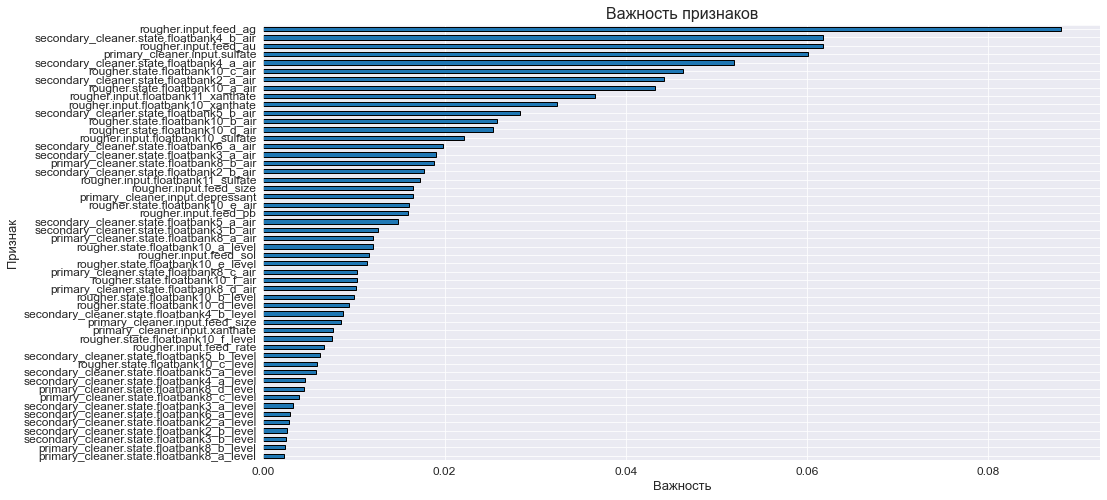

In [62]:
ax = feature_importances_df.sort_values('feature_importance').plot(kind='barh', 
                                                                    figsize=(15, 8), 
                                                                    ec='black', 
                                                                    legend=False, 
                                                                    fontsize=12)

ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность', fontsize=13)
ax.set_ylabel('Признак', fontsize=13);